# Come Visit Again
## Team Members : 
* Abhishek Tandon
* Chandrakant Sahu

# Project Overview

### Discription
TAs have collected data from Chwiggy & Yomato (restaurant sales service & review platforms)

### Evaluation
TAs are challenging us to predict the expected number of visitors to a given restaurant on given date to help the restaurants be better equipped and prepared.


### Data Description
In this competition, we are provided a time-series forecasting problem centered around restaurant visitors.<br>
The data comes from two separate sites:<br>
 -> Yomato(yom) - which uses high performance grouping (hpg) to collect and store restaurant data.<br>
 -> Chwiggy(chw) - which uses all index restaurant (air) to collect and store the restaurant data.<p>
We have use the reservations, visits, and other information from these sites to forecast future restaurant
visitor totals on a given date. The training data covers the dates from 2016 until early (first week) April 2017.
The test set covers the mid weeks (second and third weeks) of April 2017. The training and testing set both
omit days where the restaurants were closed.

<h2>File Description:</h2>
<p>This is a relational dataset from two systems. Each file is prefaced with the source (either air_ or hpg_) to indicate its origin. Each restaurant has a unique <code>chw_store_id</code> and <code>yom_store_id</code>. Note that not all restaurants are covered by both systems, and that you have been provided data beyond the restaurants for which you must forecast.</p>
<h2><strong>train.csv</strong></h2>
<p>This file contains historical visit data for the chwiggy restaurants.</p>
<ol>
<li>chw_store_id - store id with air prefix.</li>
<li>visit_date - the date</li>
<li>visitors - the number of visitors to the restaurant on the date</li>
</ol>
<h2><strong>sample_submission.csv</strong></h2>
<p>This file shows a submission in the correct format, including the days for which you must forecast.</p>
<ol>
<li>id - the id is formed by concatenating the chw_store_id and visit_date with an underscore.</li>
<li>visitors- the number of visitors forecasted for the store and date combination.</li>
</ol>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(color_codes=True)

# Chwiggy CSV Analysis

__chw_reserve__

Column Name | Column Description
-------------|:------------------
chw_store_id | restaurant id in the Chwiggy system
visit_datetime| time of the reservation
reserve_datetime | time the reservation was made
reserve_visitors | number of visitors for that reservation

In [35]:
chw_reserve = pd.read_csv('Data/come-visit-again-iiitb/chw_reserve.csv')

In [36]:
chw_reserve.head()

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,1/1/2016 19:00,1/1/2016 16:00,1
1,air_db4b38ebe7a7ceff,1/1/2016 19:00,1/1/2016 19:00,3
2,air_db4b38ebe7a7ceff,1/1/2016 19:00,1/1/2016 19:00,6
3,air_877f79706adbfb06,1/1/2016 20:00,1/1/2016 16:00,2
4,air_db80363d35f10926,1/1/2016 20:00,1/1/2016 1:00,5


In [37]:
from dateutil.parser import parse
print(parse(chw_reserve['visit_datetime'][4]))

2016-01-01 20:00:00


In [38]:
#parsing date time so that date time of every table/relation matches
chw_reserve['visit_datetime'] = [ parse(i) for i in chw_reserve['visit_datetime']]

In [39]:
chw_reserve.head()

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,1/1/2016 16:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,1/1/2016 19:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,1/1/2016 19:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,1/1/2016 16:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,1/1/2016 1:00,5


In [40]:
chw_reserve['reserve_datetime'] = [ parse(i) for i in chw_reserve['reserve_datetime']]
chw_reserve.head()

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [41]:
chw_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   chw_store_id      92378 non-null  object        
 1   visit_datetime    92378 non-null  datetime64[ns]
 2   reserve_datetime  92378 non-null  datetime64[ns]
 3   reserve_visitors  92378 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.8+ MB


* We have total 92378 rows in the table with 4 columns. 
* Visit Dates and Reserve Dates are currently object data types, which needs to be converted to __data time format__. 

In [42]:
chw_reserve.describe()

,reserve_visitors
count,92378.00
mean,4.48
std,4.92
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,100.00


* We have atleast 1 visitor for all rows. And it's obious because 0 reservation dosen't make any sence. 
* Maximum visitors count is 100 which is much higher than the mean visitors count. 
* We have data from 2016-01-01 19:00:00 and end date is 2017-05-31 21:00:00

In [43]:
#let's check if there is any null value in chw_reserve
chw_reserve.isnull().values.any()

False

There are __no null value__ in __chw_reserve__

In [44]:
print( "Number of unique restaunts in chwigge - ", len(chw_reserve['chw_store_id'].unique()))

Number of unique restaunts in chwigge -  314


In [45]:
chw_reserve["visit_year"] = pd.DatetimeIndex(chw_reserve['visit_datetime']).year
chw_reserve["visit_month"] = pd.DatetimeIndex(chw_reserve['visit_datetime']).month
chw_reserve["visit_weekday"] = pd.DatetimeIndex(chw_reserve['visit_datetime']).weekday
chw_reserve["visit_date"] = pd.DatetimeIndex(chw_reserve['visit_datetime']).date
chw_reserve.head()

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_year,visit_month,visit_weekday,visit_date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016,1,4,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016,1,4,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016,1,4,2016-01-01
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016,1,4,2016-01-01
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016,1,4,2016-01-01


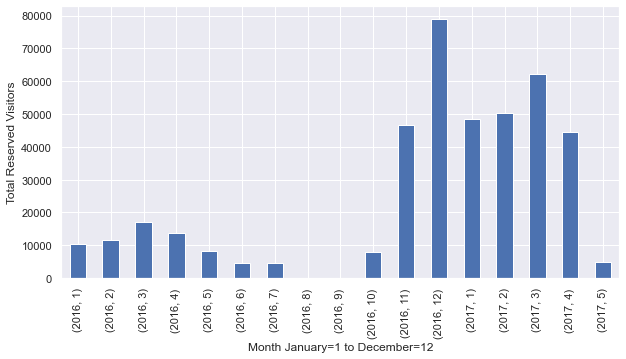

In [46]:
temp = chw_reserve.groupby(['visit_year','visit_month'])['reserve_visitors'].sum()
temp.plot(kind='bar',xlabel = "Month January=1 to December=12",ylabel="Total Reserved Visitors",figsize=(10,5))
plt.show()

* There is a certain jump in total visits after November 2016
* Missing values in Dates.

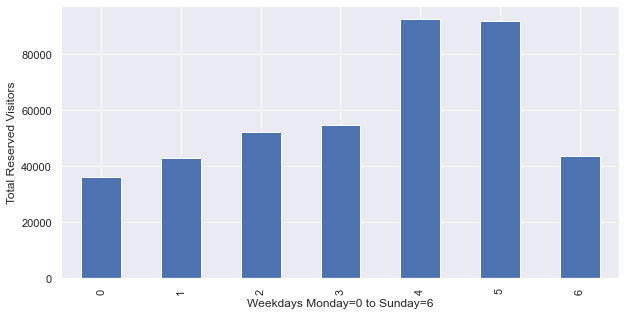

In [47]:
temp = chw_reserve.groupby('visit_weekday')['reserve_visitors'].sum()
temp.plot(kind='bar',xlabel = "Weekdays Monday=0 to Sunday=6",ylabel="Total Reserved Visitors",figsize=(10,5))
plt.show()

* There are usually more number of visitors on __Fridays and Saturdays__

# Chwiggy Store Info CSV Analysis

__chw_store_info.csv__

Column Name | Column Description
-------------|:------------------
chw_store_id | restaurant id in the air system
chw_genre_name | genre in the air system
chw_area_name | area of the restaurant in the air system
latitude | latitude
longitude | longitude

In [48]:
chw_store_info = pd.read_csv('Data/come-visit-again-iiitb/chw_store_info.csv')
chw_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   chw_store_id    829 non-null    object 
 1   chw_genre_name  829 non-null    object 
 2   chw_area_name   829 non-null    object 
 3   latitude        829 non-null    float64
 4   longitude       829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [49]:
chw_store_info

,chw_store_id,chw_genre_name,chw_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.66,139.75
...,...,...,...,...,...
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.06,141.34


In [50]:
chw_store_info.isnull().values.any()

False

In [51]:
chw_store_info['chw_store_id'].duplicated().any()

False

In [52]:
print('Number of unique restaurants in the chw_store_info table : ', len(chw_store_info['chw_store_id'].unique()))

Number of unique restaurants in the chw_store_info table :  829


* chw_store_info file has __no null__ values, data is __clean__ and all chw_store_id are __unique__

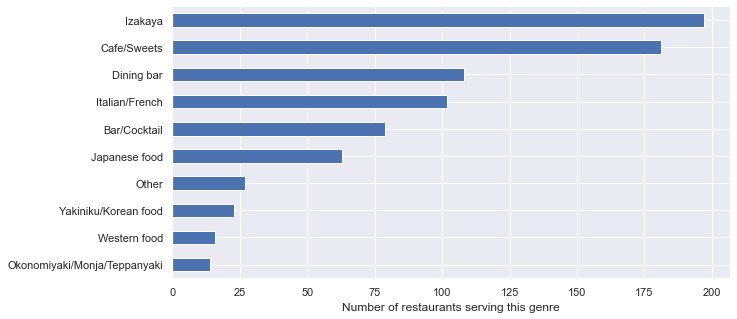

In [53]:
temp = chw_store_info['chw_genre_name'].value_counts()
temp.nlargest(10).sort_values().plot(kind='barh',figsize=(10,5))
plt.xlabel("Number of restaurants serving this genre")
plt.show()

* Above is the ordering of top 10 __popular food genres__

In [54]:
chw_store_info.chw_area_name.value_counts()

Fukuoka-ken Fukuoka-shi Daimyō           64
Tōkyō-to Shibuya-ku Shibuya              58
Tōkyō-to Minato-ku Shibakōen             51
Tōkyō-to Shinjuku-ku Kabukichō           39
Tōkyō-to Setagaya-ku Setagaya            30
                                         ..
Fukuoka-ken Kitakyūshū-shi Konyamachi     2
Tōkyō-to Taitō-ku Kuramae                 2
Tōkyō-to Shibuya-ku Jingūmae              2
Niigata-ken Kashiwazaki-shi Chūōchō       2
Tōkyō-to Shibuya-ku Higashi               2
Name: chw_area_name, Length: 103, dtype: int64

In [55]:
chw_store_info['city'] = chw_store_info['chw_area_name'].str.split().str[0]
chw_store_info['ward'] = chw_store_info['chw_area_name'].str.split().str[1]
chw_store_info['neighborhood'] = chw_store_info['chw_area_name'].str.split().str[2]
chw_store_info.head()

,chw_store_id,chw_genre_name,chw_area_name,latitude,longitude,city,ward,neighborhood
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.66,139.75,Tōkyō-to,Minato-ku,Shibakōen


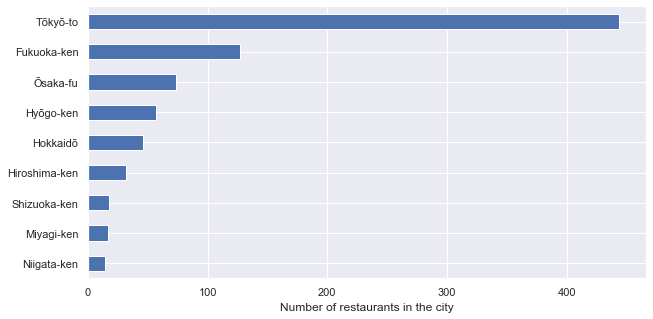

In [56]:
temp = chw_store_info['city'].value_counts()
temp.sort_values().plot(kind='barh',figsize=(10,5))
plt.xlabel("Number of restaurants in the city")
plt.show()

* City with most number of restaurants is Tokyo, Fukuoka, Osaka

# Date Info CSV Analysis

__date_info.csv__

Column Name | Column Description
-------------|:------------------
calendar_date | date
day_of_week | day of the week
holiday_flg | if the day is a holiday in Japan

In [58]:
date_info = pd.read_csv('Data/come-visit-again-iiitb/date_info.csv')
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   calendar_date  517 non-null    object
 1   day_of_week    517 non-null    object
 2   holiday_flg    517 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.2+ KB


In [59]:
date_info.calendar_date = pd.to_datetime(date_info.calendar_date)

In [60]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [61]:
date_info.holiday_flg.value_counts()

0    482
1     35
Name: holiday_flg, dtype: int64

* It is not yet clear if __holiday flag__ means restaurants are closed that day, or if restaurants are open and chances are there would be more crowd on holidays
* There are __35 Holidays__ in the span of our timeseries

In [62]:
date_info.isnull().values.any()

False

* There are __no null values__ in the table.